<a href="https://colab.research.google.com/github/HEMAMBIKA-SAIDU/base/blob/main/Copy_of_cancer_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

In [ ]:
# Define data generators for train, validation and test sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/melanoma_cancer_dataset/train',target_size=(IMG_SIZE, IMG_SIZE),batch_size=BATCH_SIZE,class_mode='binary',subset='training')
val_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/melanoma_cancer_dataset/train',target_size=(IMG_SIZE, IMG_SIZE),batch_size=BATCH_SIZE,class_mode='binary',subset='validation')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/melanoma_cancer_dataset/test',target_size=(IMG_SIZE, IMG_SIZE),batch_size=BATCH_SIZE,class_mode='binary')

Found 7712 images belonging to 2 classes.
Found 1927 images belonging to 2 classes.
Found 1003 images belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,validation_data=val_generator,epochs=1)

241/241 [==============================] - 1336s 6s/step - loss: 0.4592 - accuracy: 0.7838 - val_loss: 0.3135 - val_accuracy: 0.8827


In [ ]:
model.save("Model.h5","label.txt")

In [ ]:
#test your image
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np
from tensorflow.keras.preprocessing import image
#load the model
model = load_model('/content/Model.h5')
#load and preprocessor the test image
test_image_path = '/content/drive/MyDrive/melanoma_cancer_dataset/test/benign/melanoma_10087.jpg'
img=image.load_img(test_image_path,target_size=(224,224))
img_array=image.img_to_array(img)
img_array =np.expand_dims(img_array,axis=0) #add batch dimension
img_array /=225. #normalize the pixel values
#classes
class_names = ['you have benign cancer','You have malignant cancer']
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

In [ ]:
image = Image.open("/content/drive/MyDrive/melanoma_cancer_dataset/test/benign/melanoma_10087.jpg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

1/1 [==============================] - 0s 45ms/step
prediction:benign cancer(probability:  0.010387236  )
Accuracy:  0.039064005


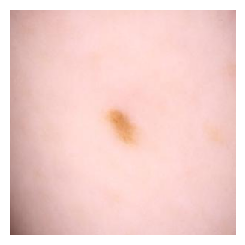

In [ ]:
# Predicts the model
import matplotlib.pyplot as plt
prediction = model.predict(data)
index = np.argmax(prediction)
confidence_score = prediction[0][index]
#make predictions
prediction = model.predict(img_array)
# Print prediction and confidence score
if prediction < 0.5 :
   print("prediction:benign cancer(probability: ",prediction[0][0]," )")
else :
  print("prediction: malignant cancer (probability: ",prediction[0][0],")")
print("Accuracy: ",confidence_score)
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
!pip install gtts


In [ ]:
from gtts import gTTS
import os

# Your medical report text
text = """Medical Report
Diagnosis: melanoma
Confidence Score: 0.85
Recommendation: Please consult with a dermatologist for further evaluation and treatment."""

# Create a gTTS object
tts = gTTS(text=text, lang='en', slow=False)

# Save the audio file
tts.save("medical_report.mp3")

# Play the audio file
os.system("start medical_report.mp3")

32512

In [ ]:
pip install numpy matplotlib reportlab


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter

# Example prediction value
prediction = 0.7

# Extract predicted class and confidence score
predicted_class = "Malignant" if prediction > 0.5 else "Benign"
confidence_score = prediction

# Print prediction and confidence score
print("Predicted Class:", predicted_class)
print("Confidence Score:", confidence_score)

# Convert prediction information to a text message
text_message = f"The predicted class is {predicted_class} with a confidence score of {confidence_score:.2f}."

# Save the plot as an image
plt.plot([1, 2, 3], [1, 2, 3])  # Example plot
plt.savefig('medical_image.png')
plt.close()

# Generate PDF report
with open("medical_report.pdf", "wb") as f:
    c = canvas.Canvas(f, pagesize=letter)
    c.drawString(100, 700, "Medical Report")
    c.drawString(100, 680, f"Predicted Class: {predicted_class}")
    c.drawString(100, 660, f"Confidence Score: {confidence_score:.2f}")
    c.drawImage("medical_image.png", 100, 400, width=300, height=200)
    c.save()

print("Medical report generated.")


Predicted Class: Malignant
Confidence Score: 0.7
Medical report generated.
